In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
all_garmin_3month = pd.read_csv('./garmin_data/finalGarminData_3Month.csv')
all_garmin_6month = pd.read_csv('./garmin_data/finalGarminData_6Month.csv')

In [ ]:
all_garmin_3month['Participant Id'].nunique()

62

In [ ]:
all_garmin_6month['Participant Id'].nunique()

42

In [ ]:
# numericCols = ['calories', 'floorsClimbed', 'hr', 'intensityMinutes', 'steps', 'stress']

# tmp_3month = all_garmin_3month.loc[:,numericCols]
# tmp_3month = tmp_3month.dropna()

# tmp_6month = all_garmin_6month.loc[:,numericCols]
# tmp_6month = tmp_6month.dropna()

# corrMatrix_3month = tmp_3month.corr()
# corrMatrix_6month = tmp_6month.corr()

# # corrMatrix_6month = all_garmin_6month.loc[:,numericCols].corr()

# sns.heatmap(corrMatrix_6month, annot=True)
# plt.title("Correlation matrix for 6month Garmin Data")

In [ ]:
# hc.loc[hc["ID"].isnull(),'ID'] = hc["First Name"] + hc["Last Name"] 
all_garmin_3month.loc[all_garmin_3month['Date'].isnull(), 'Date'] = all_garmin_3month['new_date']
all_garmin_6month.loc[all_garmin_6month['Date'].isnull(), 'Date'] = all_garmin_6month['new_date']

df3 = all_garmin_3month.drop(columns=['new_date', 'date'])
df6 = all_garmin_6month.drop(columns=['new_date', 'date'])

df3 = df3.rename(columns={'Participant Id':'mbl_cod'})
df6 = df6.rename(columns={'Participant Id':'mbl_cod'})

# df3.to_csv('./clean_garmin_3month.csv')
# df6.to_csv('./clean_garmin_6month.csv')



In [ ]:
daily_pm3 = pd.read_csv('./data/3month_daily_pm.csv')
friday_pm3 = pd.read_csv('./data/3month_friday_pm.csv')

daily_pm6 = pd.read_csv('./data/6month_daily_pm.csv')
friday_pm6 = pd.read_csv('./data/6month_friday_pm.csv')


In [ ]:
daily_pm3['mbl_cod'].nunique()

In [ ]:
tmp_daily3 = daily_pm3.copy()
tmp_friday3 = friday_pm3.copy()

tmp_daily6 = daily_pm6.copy()
tmp_friday6 = friday_pm6.copy()

def getDate(text):
    ls = text.split()
    return ls[0]

tmp_daily3['Date'] = tmp_daily3['local_time'].apply(getDate)
tmp_friday3['Date'] = tmp_friday3['local_time'].apply(getDate)

tmp_daily6['Date'] = tmp_daily6['local_time'].apply(getDate)
tmp_friday6['Date'] = tmp_friday6['local_time'].apply(getDate)

tmp_daily3 = tmp_daily3.loc[:, ['mbl_cod', 'Date', 'HOMUNCULUS']]
tmp_friday3 = tmp_friday3.loc[:, ['mbl_cod', 'Date', 'HOMUNCULUS']]

tmp_daily6 = tmp_daily6.loc[:, ['mbl_cod', 'Date', 'HOMUNCULUS']]
tmp_friday6 = tmp_friday6.loc[:, ['mbl_cod', 'Date', 'HOMUNCULUS']]

In [ ]:
daily3 = pd.concat([tmp_daily3, tmp_friday3])
daily6 = pd.concat([tmp_daily6, tmp_friday6])

In [ ]:
daily3['mbl_cod'].nunique()

68

In [ ]:
daily6['mbl_cod'].nunique()

69

In [ ]:
merge3 = df3.merge(daily3, on=['mbl_cod', 'Date'], how='inner')
# merge_friday3 = df3.merge(tmp_friday3, on=['mbl_cod', 'Date'], how='inner')

merge6 = df6.merge(daily6, on=['mbl_cod', 'Date'], how='inner')
# merge_friday6 = df6.merge(tmp_friday6, on=['mbl_cod', 'Date'], how='inner')

In [ ]:
new_cols = ['joint-ankle-right:0', 
            'joint-base-little-toe-right:0', 
            'joint-middle-little-toe-right:0', 
            'joint-middle-ring-toe-right:0', 
            'joint-base-ring-toe-right:0', 
            'joint-middle-middle-toe-right:0', 
            'joint-middle-long-toe-right:0', 
            'joint-base-middle-toe-right:0', 
            'joint-base-long-toe-right:0', 
            'joint-middle-big-toe-right:0', 
            'joint-base-big-toe-right:0', 
            'joint-base-big-toe-left:0', 
            'joint-base-long-toe-left:0', 
            'joint-middle-big-toe-left:0', 
            'joint-middle-long-toe-left:0', 
            'joint-middle-middle-toe-left:0', 
            'joint-base-middle-toe-left:0', 
            'joint-middle-ring-toe-left:0', 
            'joint-base-ring-toe-left:0', 
            'joint-middle-little-toe-left:0', 
            'joint-base-little-toe-left:0', 
            'joint-ankle-left:0', 
            'joint-knee-right:0', 
            'joint-knee-left:0', 
            'joint-knuckle-little-finger-right:0', 
            'joint-middle-little-finger-right:0', 
            'joint-end-little-finger-right:0', 
            'joint-end-ring-finger-right:0', 
            'joint-middle-ring-finger-right:0', 
            'joint-end-middle-finger-right:0', 
            'joint-middle-middle-finger-right:0', 
            'joint-end-index-finger-right:0', 
            'joint-middle-index-finger-right:0', 
            'joint-middle-thumb-right:0', 
            'joint-knuckle-ring-finger-right:0', 
            'joint-knuckle-middle-finger-right:0', 
            'joint-knuckle-index-finger-right:0', 
            'joint-knuckle-thumb-right:0', 
            'joint-wrist-right:0', 
            'joint-hip-right:0', 
            'joint-hip-left:0', 
            'joint-back-lower:0', 
            'joint-elbow-right:0', 
            'joint-shoulder-right:0', 
            'joint-shoulder-left:0', 
            'joint-back-mid:0', 
            'joint-back-upper:0', 
            'joint-collar-bone-right:0', 
            'joint-collar-bone-left:0', 
            'joint-jaw-right:0', 
            'joint-jaw-left:0', 
            'joint-neck:0', 
            'joint-knuckle-thumb-left:0', 
            'joint-knuckle-index-finger-left:0', 
            'joint-knuckle-middle-finger-left:0', 
            'joint-knuckle-ring-finger-left:0', 
            'joint-knuckle-little-finger-left:0', 
            'joint-middle-thumb-left:0', 
            'joint-middle-index-finger-left:0', 
            'joint-middle-middle-finger-left:0', 
            'joint-middle-ring-finger-left:0', 
            'joint-middle-little-finger-left:0', 
            'joint-end-little-finger-left:0', 
            'joint-end-index-finger-left:0', 
            'joint-end-middle-finger-left:0', 
            'joint-end-ring-finger-left:0', 
            'joint-wrist-left:0', 
            'joint-elbow-left:0']

In [ ]:
def clean_new_col(ls):
    res = []
    for body_part in ls:
        # temp_ls = body_part.split(':')
        #print(body_part.split(':')[0])
        res.append(body_part.split(':')[0])
    print(res)
    return res

new_cols = clean_new_col(new_cols)

['joint-ankle-right', 'joint-base-little-toe-right', 'joint-middle-little-toe-right', 'joint-middle-ring-toe-right', 'joint-base-ring-toe-right', 'joint-middle-middle-toe-right', 'joint-middle-long-toe-right', 'joint-base-middle-toe-right', 'joint-base-long-toe-right', 'joint-middle-big-toe-right', 'joint-base-big-toe-right', 'joint-base-big-toe-left', 'joint-base-long-toe-left', 'joint-middle-big-toe-left', 'joint-middle-long-toe-left', 'joint-middle-middle-toe-left', 'joint-base-middle-toe-left', 'joint-middle-ring-toe-left', 'joint-base-ring-toe-left', 'joint-middle-little-toe-left', 'joint-base-little-toe-left', 'joint-ankle-left', 'joint-knee-right', 'joint-knee-left', 'joint-knuckle-little-finger-right', 'joint-middle-little-finger-right', 'joint-end-little-finger-right', 'joint-end-ring-finger-right', 'joint-middle-ring-finger-right', 'joint-end-middle-finger-right', 'joint-middle-middle-finger-right', 'joint-end-index-finger-right', 'joint-middle-index-finger-right', 'joint-mid

In [ ]:
import numpy as np

merge3[new_cols] = merge3.HOMUNCULUS.str.split(",", expand=True)
merge6[new_cols] = merge6.HOMUNCULUS.str.split(",", expand=True)

# merge_friday3[new_cols] = merge_friday3.HOMUNCULUS.str.split(",", expand=True)
# merge_friday6[new_cols] = merge_friday6.HOMUNCULUS.str.split(",", expand=True)

def getVal(text):
    if (isinstance(text, str)):
        ls = text.split(":")
        if len(ls) > 1:
            return float(ls[1])
    else:
        return np.nan
    
     
for col in new_cols:
    merge3[col] = merge3[col].apply(getVal)
    merge6[col] = merge6[col].apply(getVal)
    
    # merge_friday3[col] = merge_friday3[col].apply(getVal)
    # merge_friday6[col] = merge_friday6[col].apply(getVal)


In [ ]:
merge3['sum'] = merge3[new_cols].sum(axis=1)
merge6['sum'] = merge6[new_cols].sum(axis=1)

# merge_friday3['sum'] = merge_friday3[new_cols].sum(axis=1)
# merge_friday6['sum'] = merge_friday6[new_cols].sum(axis=1)

In [ ]:
keep_cols = ['mbl_cod', 'Date', 'calories', 'floorsClimbed', 'hr', 'intensityMinutes', 'steps', 'stress', 'sum']

filt3 = merge3.loc[:, keep_cols]
filt6 = merge6.loc[:, keep_cols]  
# filt_friday3 = merge_friday3.loc[:, keep_cols]
# filt_friday6 = merge_friday6.loc[:, keep_cols]

In [ ]:
filt3['mbl_cod'].nunique()

60

In [ ]:
filt6['mbl_cod'].nunique()

41

Text(0.5, 1.0, 'Correlation matrix for 3month Homunculus with Garmin Data')

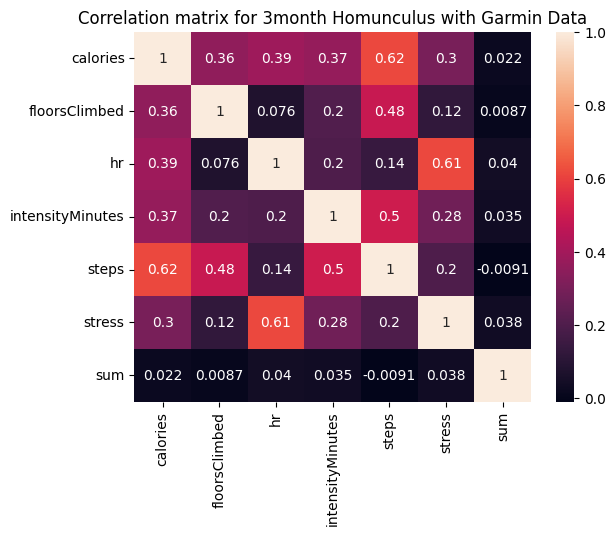

In [ ]:
numericCols = ['calories', 'floorsClimbed', 'hr', 'intensityMinutes', 'steps', 'stress', 'sum']

tmp3 = filt3.loc[:, numericCols].dropna()
tmp6 = filt6.loc[:, numericCols].dropna()  
# tmp_friday3 = filt_friday3.loc[:, numericCols].dropna()
# tmp_friday6 = filt_friday6.loc[:, numericCols].dropna()

corr_3 = tmp3.corr()
corr_6 = tmp6.corr()

# corr_friday3 = tmp_friday3.corr()
# corr_friday6 = tmp_friday6.corr()

sns.heatmap(corr_3, annot=True)
plt.title("Correlation matrix for 3month Homunculus with Garmin Data")

In [ ]:
def get6Month(df):
    temp = df.copy()
    temp['Date'] = pd.to_datetime(temp['Date'])
    temp['Month'] = temp['Date'].dt.month
    temp = temp.groupby(by="Month", as_index=False).mean()
    temp = temp[temp.Month != 4]
    temp = temp[temp.Month != 11]   
    return temp

def get3Month(df):
    temp = df.copy()
    temp['Date'] = pd.to_datetime(temp['Date'])
    temp['Month'] = temp['Date'].dt.month
    temp = temp.groupby(by="Month", as_index=False).mean()
    # temp = temp[temp.Month != 4]
    # temp = temp[temp.Month != 11]   
    return temp

In [ ]:
final3 = get3Month(filt3)
final6 = get6Month(filt6)

/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_52230/3087171795.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = temp.groupby(by="Month", as_index=False).mean()
/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_52230/3087171795.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = temp.groupby(by="Month", as_index=False).mean()


In [ ]:
final3

,Month,mbl_cod,calories,floorsClimbed,hr,intensityMinutes,steps,stress,sum
0,5,5.233870e+07,1638.114198,5.230118,79.842903,36.253054,4544.192248,34.492781,1.766975
1,6,5.185887e+07,1490.039574,4.078049,79.817576,28.504146,3745.588685,32.628651,1.244310
2,7,5.011161e+07,1460.182573,4.965066,78.607433,26.189498,3756.427083,31.025330,0.860996
3,8,5.014612e+07,1486.462810,4.935897,78.288787,23.093897,3771.163180,32.055418,0.867769


In [ ]:
final6

,Month,mbl_cod,calories,floorsClimbed,hr,intensityMinutes,steps,stress,sum
0,5,5.760532e+07,1577.800866,4.753521,78.563527,41.401891,4677.172113,34.798668,1.701299
1,6,5.684896e+07,1406.257511,3.466667,78.879245,29.282460,3893.935345,34.104193,1.293362
2,7,5.497208e+07,1396.305233,4.012012,78.761375,35.101852,3984.700581,32.797749,0.968023
3,8,5.418465e+07,1460.556728,3.760108,78.527805,36.296830,4123.684350,32.102428,0.870712
4,9,5.451488e+07,1402.591900,3.458599,78.903769,39.409556,3923.493750,33.072863,0.598131
5,10,5.627045e+07,1427.938596,3.425926,79.260606,39.485000,4243.792952,32.152634,0.526316


In [ ]:
# merge_daily6['Date'] = pd.to_datetime(merge_daily6['Date'])
# merge_daily6['Month'] = merge_daily6['Date'].dt.month
# merge_daily6 = merge_daily6.groupby(by="Month", as_index=False).mean()
# merge_daily6 = merge_daily6[merge_daily6.Month != 4]
# merge_daily6 = merge_daily6[merge_daily6.Month != 11]

Comparing Homunculus scores with 3 month

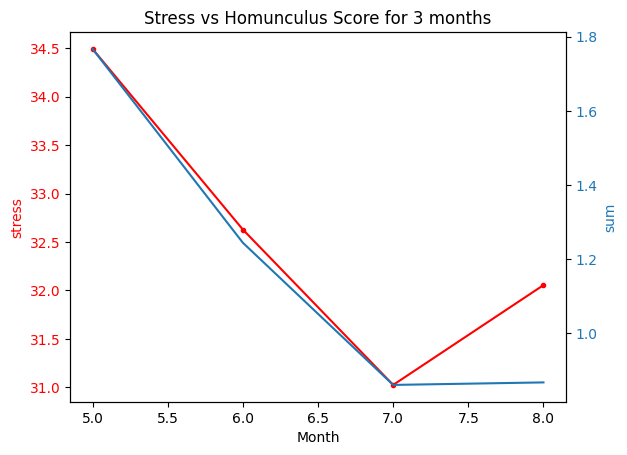

In [ ]:
# vs Stress
fig, ax1 = plt.subplots()
ax1.plot(final3.Month, final3['stress'], '.r-')
ax1.set_ylabel('stress', color='r') 
ax1.tick_params(axis='y', labelcolor='r')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(final3.Month, final3['sum'], color)
ax2.set_ylabel('sum', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Month")
plt.title("Stress vs Homunculus Score for 3 months")
plt.show()

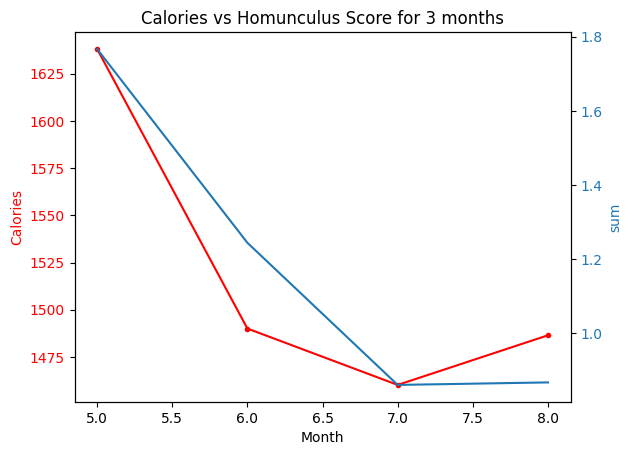

In [ ]:
# vs Calories
fig, ax1 = plt.subplots()
ax1.plot(final3.Month, final3['calories'], '.r-')
ax1.set_ylabel('Calories', color='r') 
ax1.tick_params(axis='y', labelcolor='r')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(final3.Month, final3['sum'], color)
ax2.set_ylabel('sum', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Month")
plt.title("Calories vs Homunculus Score for 3 months")
plt.show()

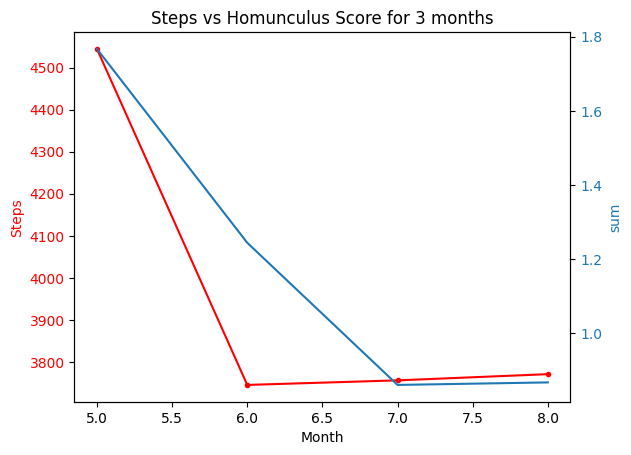

In [ ]:
# vs steps
fig, ax1 = plt.subplots()
ax1.plot(final3.Month, final3['steps'], '.r-')
ax1.set_ylabel('Steps', color='r') 
ax1.tick_params(axis='y', labelcolor='r')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(final3.Month, final3['sum'], color)
ax2.set_ylabel('sum', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Month")
plt.title("Steps vs Homunculus Score for 3 months")
plt.show()

Comparing Homunculus scores with 6 month

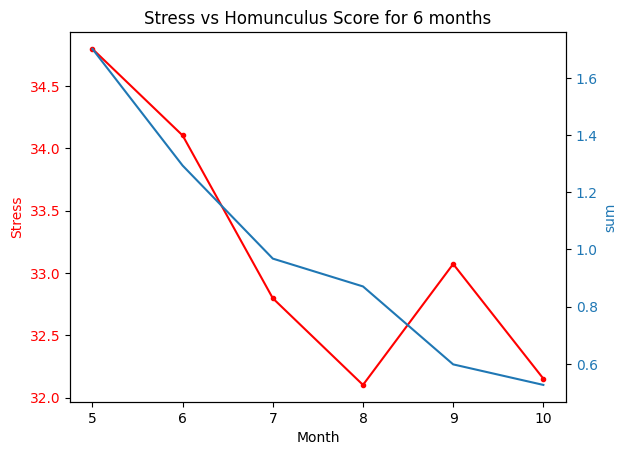

In [ ]:
# vs stress
fig, ax1 = plt.subplots()
ax1.plot(final6.Month, final6['stress'], '.r-')
ax1.set_ylabel('Stress', color='r') 
ax1.tick_params(axis='y', labelcolor='r')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(final6.Month, final6['sum'], color)
ax2.set_ylabel('sum', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Month")
plt.title("Stress vs Homunculus Score for 6 months")
plt.show()

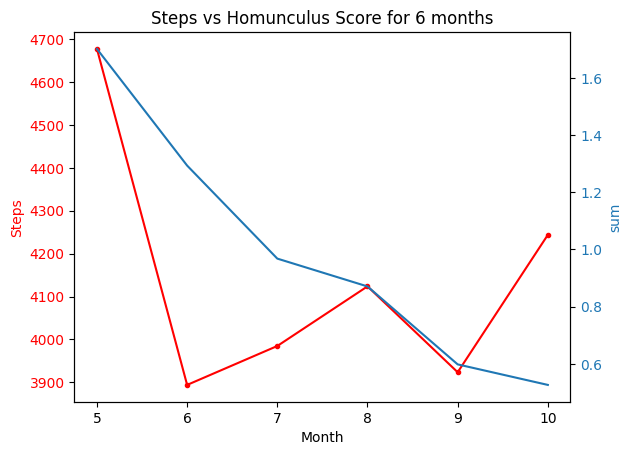

In [ ]:
# vs steps
fig, ax1 = plt.subplots()
ax1.plot(final6.Month, final6['steps'], '.r-')
ax1.set_ylabel('Steps', color='r') 
ax1.tick_params(axis='y', labelcolor='r')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(final6.Month, final6['sum'], color)
ax2.set_ylabel('sum', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Month")
plt.title("Steps vs Homunculus Score for 6 months")
plt.show()

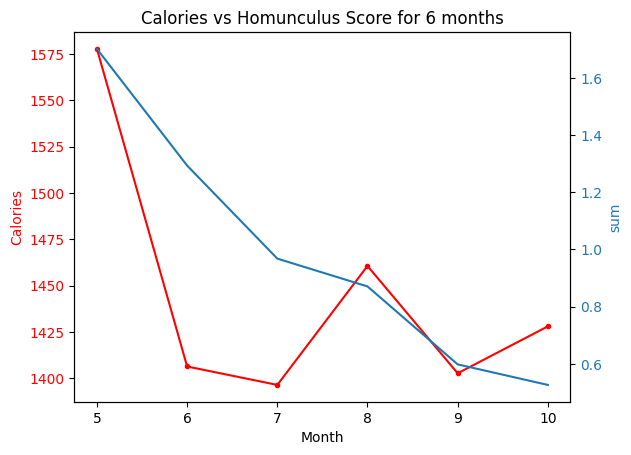

In [ ]:
# vs calories
fig, ax1 = plt.subplots()
ax1.plot(final6.Month, final6['calories'], '.r-')
ax1.set_ylabel('Calories', color='r') 
ax1.tick_params(axis='y', labelcolor='r')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(final6.Month, final6['sum'], color)
ax2.set_ylabel('sum', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Month")
plt.title("Calories vs Homunculus Score for 6 months")
plt.show()

In [ ]:
from scipy.stats.stats import pearsonr

/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_52230/4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Finding Pearson Correlation Coefficients and doing the p-test for 3 month

In [ ]:
stat, p = pearsonr(final3['calories'], final3['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=0.937, p=0.063
correlation is not statistically significant


In [ ]:
stat, p = pearsonr(final3['steps'], final3['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=0.899, p=0.101
correlation is not statistically significant


In [ ]:
stat, p = pearsonr(final3['stress'], final3['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=0.958, p=0.042
correlation is statistically significant


In [ ]:
stat, p = pearsonr(final3['hr'], final3['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=0.860, p=0.140
correlation is not statistically significant


Finding Pearson Correlation Coefficients and doing the p-test for 6 month

In [ ]:
stat, p = pearsonr(final6['calories'], final6['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=0.696, p=0.125
correlation is not statistically significant


In [ ]:
stat, p = pearsonr(final6['steps'], final6['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=0.537, p=0.272
correlation is not statistically significant


In [ ]:
stat, p = pearsonr(final6['stress'], final6['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=0.871, p=0.024
correlation is statistically significant


In [ ]:
stat, p = pearsonr(final6['hr'], final6['sum'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=-0.615, p=0.193
correlation is not statistically significant
